In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import math

(1003, 1536, 3)


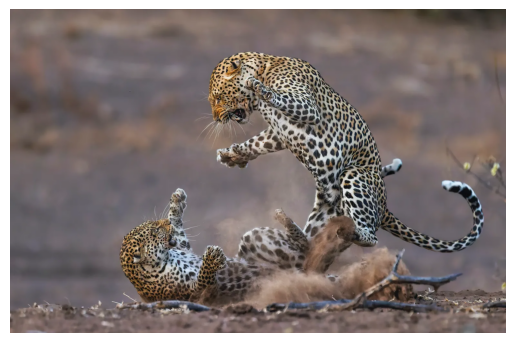

In [3]:
image1o=cv2.imread('LEOPARDS.JPG')
image1=cv2.cvtColor(image1o,cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.axis('off')
print(image1.shape)

### image transformation ###

#### Translation ####

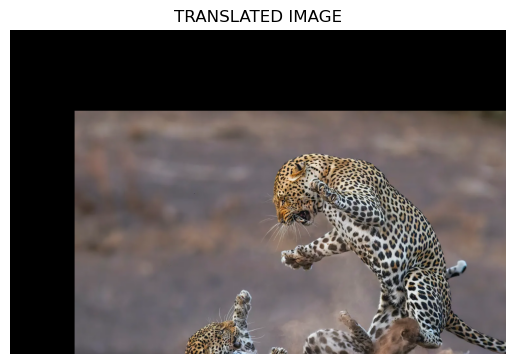

(1003, 1536, 3)


In [4]:
height, width, channels = image1.shape
dx, dy = 200, 250 
translation_matrix = np.array([
    [1, 0, dx],
    [0, 1, dy],
    [0, 0, 1]
])
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
coords = np.vstack([x_coords.flatten(), y_coords.flatten(), np.ones_like(x_coords.flatten())])
translated_coords = np.dot(translation_matrix, coords)
new_x = translated_coords[0].astype(int)
new_y = translated_coords[1].astype(int)
translated_image = np.zeros_like(image1)
valid_mask = (new_x >= 0) & (new_x < width) & (new_y >= 0) & (new_y < height)
translated_image[new_y[valid_mask], new_x[valid_mask]] = image1[y_coords.flatten()[valid_mask], x_coords.flatten()[valid_mask]]
plt.imshow(translated_image)
plt.title('TRANSLATED IMAGE')
plt.axis('off')
plt.show()
print(translated_image.shape)

#### Rotation ####

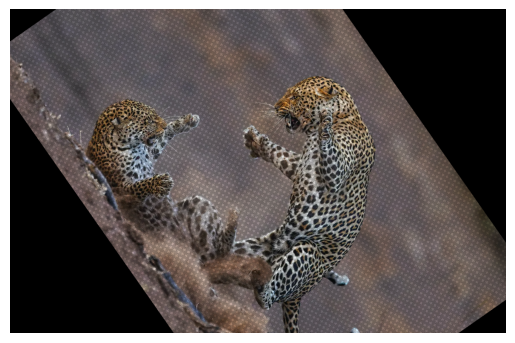

(1003, 1536, 3)


In [5]:
angle=55
ang_rad = math.radians(angle)
h, w, c = image1.shape

ctr_x, ctr_y = w // 2, h // 2

rot_img = np.zeros_like(image1)

for i in range(h):
    for j in range(w):
        
        x_shift = j - ctr_x
        y_shift = i - ctr_y
        
        
        new_x = int(x_shift * math.cos(ang_rad) - y_shift * math.sin(ang_rad) + ctr_x)
        new_y = int(x_shift * math.sin(ang_rad) + y_shift * math.cos(ang_rad) + ctr_y)
        
        if 0 <= new_x < w and 0 <= new_y < h:
            rot_img[new_y, new_x] = image1[i, j]

plt.imshow(rot_img)
plt.axis("off")
plt.show()
print(rot_img.shape)    

#### scaling ####

(3510, 3840, 3)


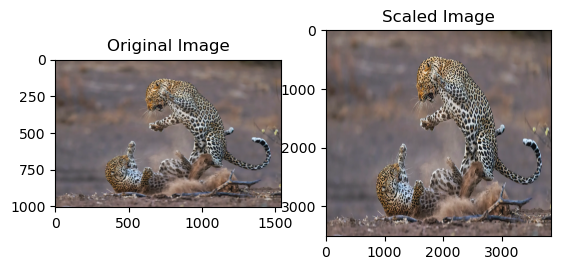

In [11]:
sx = 2.5 
sy = 3.5  
new_width = int(width * sx)
new_height = int(height * sy)

scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

for y in range(new_height):
    for x in range(new_width):
        original_x = int(x / sx) 
        original_y = int(y / sy) 
        
        original_x = min(original_x, width - 1)
        original_y = min(original_y, height - 1)
        
        scaled_image[y, x] = image1[original_y, original_x]

print(scaled_image.shape)
plt.subplot(1,2,1)
plt.imshow(image1)
plt.title("Original Image");
#plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(scaled_image)
plt.title("Scaled Image");
#plt.axis("off");

#### shear ####

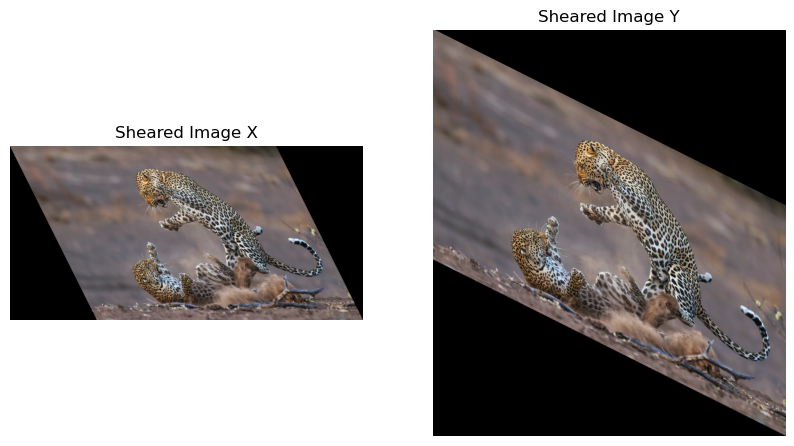

In [15]:
def shear_image(image1, shear_factor_x=0, shear_factor_y=0):
    height, width = image1.shape[:2]
    new_width = width + int(abs(shear_factor_x) * height)
    new_height = height + int(abs(shear_factor_y) * width)
    sheared_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            new_x = int(x + shear_factor_x * y)  
            new_y = int(y + shear_factor_y * x)  
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                sheared_img[new_y, new_x] = image1[y, x]
    
    return sheared_img

sheared_img_x = shear_image(image1, shear_factor_x=0.5)

sheared_img_y = shear_image(image1, shear_factor_y=0.5)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(sheared_img_x)
plt.title("Sheared Image X")
plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(sheared_img_y)
plt.title("Sheared Image Y")
plt.axis("off");

#### REFLECTION ####

(1003, 1536, 3)


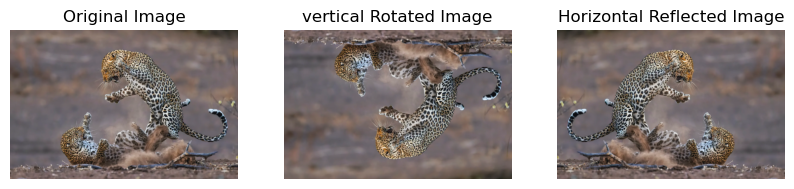

In [21]:
reflected_image_x = np.zeros_like(image1)
reflected_image_y = np.zeros_like(image1)

for y in range(height):
    for x in range(width):
        new_y = height - 1 - y
        reflected_image_x[new_y, x] = image1[y, x]
for y in range(height):
        for x in range(width):
            new_x = width - x - 1  
            reflected_image_y[y, new_x] = image1[y, x]
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(image1)
plt.title("Original Image")
plt.axis("off");
plt.subplot(1,3,2)
plt.imshow(reflected_image_x)
plt.title("vertical Rotated Image")
plt.axis("off");
plt.subplot(1,3,3)
plt.imshow(reflected_image_y)
plt.title("Horizontal Reflected Image")
plt.axis("off");
print(reflected_image_x.shape)    

### image 2 ###

(1003, 1536, 3)


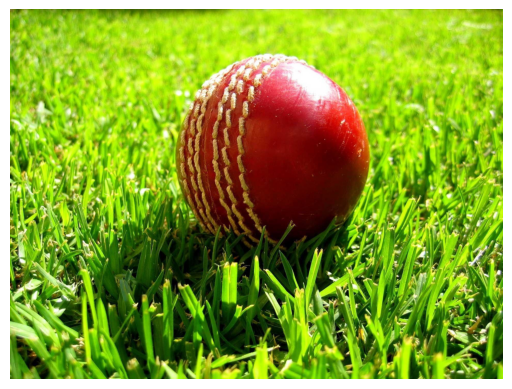

In [22]:
image2o=cv2.imread('images/cric.jpg')
image2=cv2.cvtColor(image2o,cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.axis('off')
print(image1.shape)

### image transformation ###

#### Translation ####

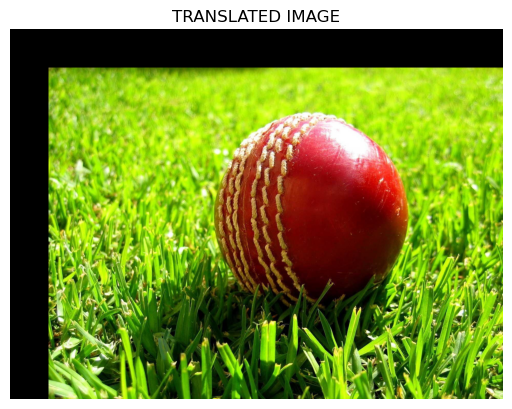

(1440, 1920, 3)


In [23]:
height, width, channels = image2.shape
dx, dy = 150, 150 
translation_matrix = np.array([
    [1, 0, dx],
    [0, 1, dy],
    [0, 0, 1]
])
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))
coords = np.vstack([x_coords.flatten(), y_coords.flatten(), np.ones_like(x_coords.flatten())])
translated_coords = np.dot(translation_matrix, coords)
new_x = translated_coords[0].astype(int)
new_y = translated_coords[1].astype(int)
translated_image = np.zeros_like(image2)
valid_mask = (new_x >= 0) & (new_x < width) & (new_y >= 0) & (new_y < height)
translated_image[new_y[valid_mask], new_x[valid_mask]] = image2[y_coords.flatten()[valid_mask], x_coords.flatten()[valid_mask]]
plt.imshow(translated_image)
plt.title('TRANSLATED IMAGE')
plt.axis('off')
plt.show()
print(translated_image.shape)

#### Rotation ####

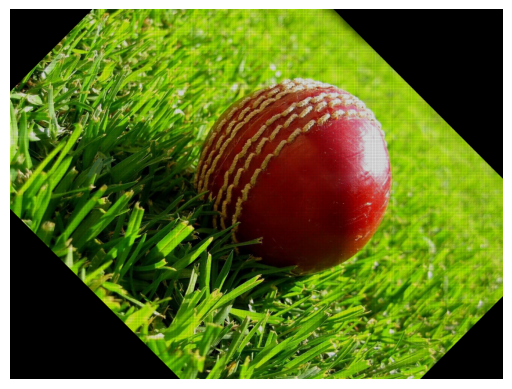

(1440, 1920, 3)


In [24]:
angle=45
ang_rad = math.radians(angle)
h, w, c = image2.shape

ctr_x, ctr_y = w // 2, h // 2

rot_img = np.zeros_like(image2)

for i in range(h):
    for j in range(w):
        
        x_shift = j - ctr_x
        y_shift = i - ctr_y
        
        
        new_x = int(x_shift * math.cos(ang_rad) - y_shift * math.sin(ang_rad) + ctr_x)
        new_y = int(x_shift * math.sin(ang_rad) + y_shift * math.cos(ang_rad) + ctr_y)
        
        if 0 <= new_x < w and 0 <= new_y < h:
            rot_img[new_y, new_x] = image2[i, j]

plt.imshow(rot_img)
plt.axis("off")
plt.show()
print(rot_img.shape)   

#### scaling ####

(5040, 4800, 3)


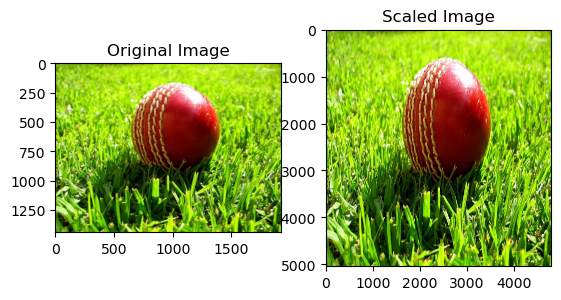

In [25]:
sx = 2.5 
sy = 3.5  
new_width = int(width * sx)
new_height = int(height * sy)

scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

for y in range(new_height):
    for x in range(new_width):
        original_x = int(x / sx) 
        original_y = int(y / sy) 
        
        original_x = min(original_x, width - 1)
        original_y = min(original_y, height - 1)
        
        scaled_image[y, x] = image2[original_y, original_x]

print(scaled_image.shape)
plt.subplot(1,2,1)
plt.imshow(image2)
plt.title("Original Image");
#plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(scaled_image)
plt.title("Scaled Image");
#plt.axis("off");

#### shear ####

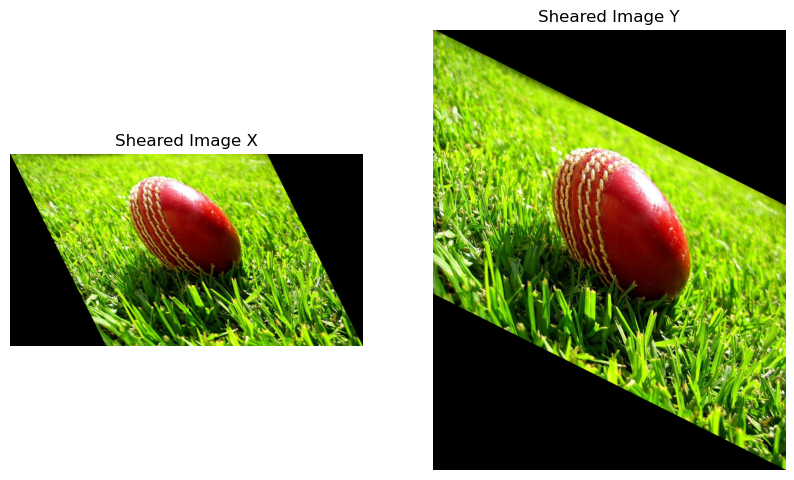

In [26]:
def shear_image(image2, shear_factor_x=0, shear_factor_y=0):
    height, width = image2.shape[:2]
    new_width = width + int(abs(shear_factor_x) * height)
    new_height = height + int(abs(shear_factor_y) * width)
    sheared_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            new_x = int(x + shear_factor_x * y)  
            new_y = int(y + shear_factor_y * x)  
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                sheared_img[new_y, new_x] = image2[y, x]
    
    return sheared_img

sheared_img_x = shear_image(image2, shear_factor_x=0.5)

sheared_img_y = shear_image(image2, shear_factor_y=0.5)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(sheared_img_x)
plt.title("Sheared Image X")
plt.axis("off");
plt.subplot(1,2,2)
plt.imshow(sheared_img_y)
plt.title("Sheared Image Y")
plt.axis("off");

#### REFLECTION ####

(1440, 1920, 3)


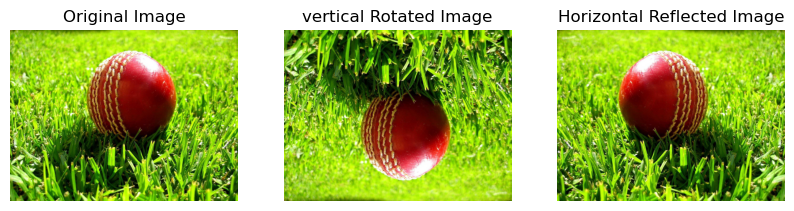

In [27]:
reflected_image_x = np.zeros_like(image2)
reflected_image_y = np.zeros_like(image2)

for y in range(height):
    for x in range(width):
        new_y = height - 1 - y
        reflected_image_x[new_y, x] = image2[y, x]
for y in range(height):
        for x in range(width):
            new_x = width - x - 1  
            reflected_image_y[y, new_x] = image2[y, x]
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(image2)
plt.title("Original Image")
plt.axis("off");
plt.subplot(1,3,2)
plt.imshow(reflected_image_x)
plt.title("vertical Rotated Image")
plt.axis("off");
plt.subplot(1,3,3)
plt.imshow(reflected_image_y)
plt.title("Horizontal Reflected Image")
plt.axis("off");
print(reflected_image_x.shape)    